<img src="https://1000logos.net/wp-content/uploads/2017/08/Airbnb-logo.jpg" width="250" align="left">

In [1]:
# Read file into a list called airbnb_data

import csv

with open ("airbnb_data.csv", encoding="utf-8") as f:
    
    reader = csv.DictReader(f)
    
         
    airbnb_data = []
    for row in reader:
        airbnb_data.append(dict(row))
        
        
airbnb_data[0:3]    

[{'listing_id': '1133718',
  'survey_id': '1280',
  'host_id': '6219420',
  'room_type': 'Shared room',
  'country': '',
  'city': 'Singapore',
  'borough': '',
  'neighborhood': 'MK03',
  'reviews': '9',
  'overall_satisfaction': '4.5',
  'accommodates': '12',
  'bedrooms': '1.0',
  'bathrooms': '',
  'price': '74.0',
  'minstay': '',
  'last_modified': '2017-05-17 09:10:25.431659',
  'latitude': '1.293354',
  'longitude': '103.769226',
  'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'},
 {'listing_id': '3179080',
  'survey_id': '1280',
  'host_id': '15295886',
  'room_type': 'Shared room',
  'country': '',
  'city': 'Singapore',
  'borough': '',
  'neighborhood': 'TS17',
  'reviews': '15',
  'overall_satisfaction': '5.0',
  'accommodates': '12',
  'bedrooms': '1.0',
  'bathrooms': '',
  'price': '77.0',
  'minstay': '',
  'last_modified': '2017-05-17 09:10:24.216548',
  'latitude': '1.310862',
  'longitude': '103.858828',
  'location': '0101000020E6100000E738B709F7F6

## Data Cleaning 

In [2]:
for row in airbnb_data:
    row['overall_satisfaction'] = float(row['overall_satisfaction'])
    row['price'] = float(row['price'])
    row['longitude'] = float(row['longitude'])
    row['latitude'] = float(row['latitude'])
    row['reviews'] = float(row['reviews'])
    
print(airbnb_data[0:1])

[{'listing_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': 9.0, 'overall_satisfaction': 4.5, 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': 74.0, 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': 1.293354, 'longitude': 103.769226, 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}]


## Exploratory Data Analysis 

The data team at AirBnB wishes to find out the answers to a few simple questions on the existing listings in Singapore. Our goal is to manipulate the data you have stored in the list of dictionaries and <b>understand some of the basic statistics of your dataset.</b> The following are some of the common <i>first</i> questions asked.

<h4> Q1. List out each neighborhoods and their number of listings</h4>

In [3]:
results = {}

for row in airbnb_data:
    
    neighborhood = row['neighborhood']
    
    if neighborhood not in results:
        
        results[neighborhood] = 1
        
    else:
        
        results[neighborhood] +=1
        
print(results['TS17'])

342


<h4> Q2. List out each neighborhood and their average overall_satisfaction</h4>


In [4]:
neighborhood_scores = {}
neighborhood_counts = {}
average_score = {}

for row in airbnb_data: 
    neighborhood = row['neighborhood']
    reviews = row['reviews']
    overall_satisfaction = row['overall_satisfaction']
    
    if reviews > 0:    
        if neighborhood not in neighborhood_counts: 
            
            neighborhood_counts[neighborhood] = 1  
            neighborhood_scores[neighborhood] = overall_satisfaction
             
        else:        
            neighborhood_counts[neighborhood] += 1
            neighborhood_scores[neighborhood] += overall_satisfaction

        average_score[neighborhood] = neighborhood_scores[neighborhood] / neighborhood_counts[neighborhood]

print(average_score['TS17'])

2.859447004608295


<h4> Q3. List out each neighborhood and their average price</h4>

In [5]:
neighborhood_price = {}
neighborhood_counts = {}
average_price = {}

for row in airbnb_data: 
    neighborhood = row['neighborhood']
    reviews = row['reviews']
    price = row['price']
       
    if neighborhood not in neighborhood_counts: 
            
        neighborhood_counts[neighborhood] = 1  
        neighborhood_price[neighborhood] = price
             
    else:        
        neighborhood_counts[neighborhood] += 1
        neighborhood_price[neighborhood] += price

    average_price[neighborhood] = neighborhood_price[neighborhood] / neighborhood_counts[neighborhood]

print(average_price['TS17'])

95.5672514619883


# <h4> Q4. Plot a distribution of counts of the overall_satisfaction</h4>

dict_items([(4.5, 1435), (5.0, 1032), (0.0, 1408), (4.0, 476), (3.5, 155), (2.5, 12), (3.0, 44), (2.0, 3), (1.0, 1), (1.5, 1)])


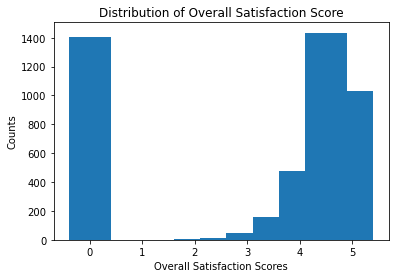

In [6]:
satisfaction = {}
satisfaction_tup_score = []
satisfaction_tup_count = []

for row in airbnb_data:
    overall_satisfaction = row['overall_satisfaction']
    reviews = row['reviews']
    
    if reviews > 0:   
        if overall_satisfaction not in satisfaction:
        
            satisfaction[overall_satisfaction] = 1
        
        else:
        
            satisfaction[overall_satisfaction] += 1
        
list_of_tup = satisfaction.items()

print(list_of_tup)
        
for score, count in satisfaction.items():    
    satisfaction_tup_score.append(score)
    satisfaction_tup_count.append(count)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


score = satisfaction_tup_score
count = satisfaction_tup_count


plt.bar(score, count)

plt.xlabel('Overall Satisfaction Scores')
plt.ylabel('Counts')
plt.title('Distribution of Overall Satisfaction Score')

plt.show()

<h4> Q5. Plot a geographical representation of all of the listings in Singapore</h4> 

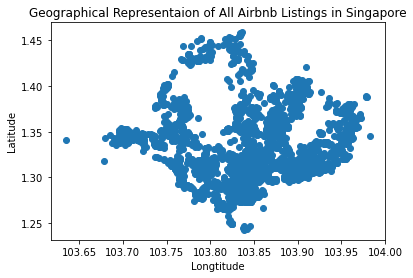

In [7]:
latitude_list = []
longtitude_list = []

for row in airbnb_data:
    latitude = row['latitude']
    longtitude = row['longitude']
    
    latitude_list.append(latitude)
    longtitude_list.append(longtitude)
    
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

lat = latitude_list
lon = longtitude_list

plt.scatter(lon, lat)

plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Geographical Representaion of All Airbnb Listings in Singapore')

plt.show()

<hr>
</hr>
<h2> AirBnB Visualisation and Price Recommender App</h2>

<b>Scenario:</b>

Based on the earlier EDA, we have seen that it is not modular and does not allow the AirBnB team to look into each neighborhood. Nevertheless, the AirBnB data team have tasked to build a simple application to improve the earlier EDA while serving its 2 users: Guests and Hosts. 

<b>Your objective:</b> Develop an <b><i>app</i></b> which will serve the 2 main users:
1. Guests
    - Visualisation tool to recommend them the best listings based on price and overall satisfaction score in a neighborhood
2. Hosts
    - Recommend a price to set for their listing in a given neighborhood based on better performing listings

<hr>
</hr>

<hr></hr>

<h2> Building the App </h2>

To begin building the App, there are 2 things to do:
1. Building the functions
2. Testing the functions 

<b>After we are done building the functions in part 1, we will test them in part 2</b>

In [8]:
# Running this cell shows no output. This is normal because the function has been created but not called/used.
def example_function(interesting_data):
    for i in interesting_data:
        print(i)

In [9]:
# Running this cell shows an output because the function is called/used.
example_function([1,2,3,4,5])

1
2
3
4
5


### `get_all_latitudes()` - Functions to get all latitudes given a list of listing_ids 

In [10]:
def get_all_latitude(airbnb_data, entries):
    
    results = []    
    results_dict = {}
    
    for row in airbnb_data:
        listing_ids = row['listing_id']
        latitudes = row['latitude']
        
        if listing_ids not in results_dict:
            results_dict[listing_ids] = latitudes
            
    for listing_id, lat in results_dict.items():
        
        if listing_id in entries:
            results.append(lat)
                       
        
    return results

<b>Tester Cell</b> - To test the above function to see if it's working.

In [11]:
get_all_latitude(airbnb_data, ['10350448','13507262','13642646'])

[1.305702, 1.296138, 1.304393]

### `get_all_longitudes()` - Functions to get all longitudes given a list of listing_ids</font>

In [12]:
def get_all_longitude(airbnb_data, entries):
    
    results = []
    results_dict = {}
    
    for row in airbnb_data:
        listing_ids = row['listing_id']
        longitude = row['longitude']
        
        if listing_ids not in results_dict:
            results_dict[listing_ids] = longitude
            
    for listing_id, long in results_dict.items():
        
        if listing_id in entries:
            results.append(long)
            
    return results

<b>Tester Cell</b> - To test the above function to see if it's working.

In [13]:
get_all_longitude(airbnb_data, ['10350448','13507262','13642646'])

[103.79878, 103.767841, 103.784174]

### `listings_recommender()` - Function to recommend all listings based on a given price, satisfaction score and neighborhood 

In [14]:
def listings_recommender(airbnb_data, price_entry, overall_satisfaction_entry, neighborhood_id_entry):
    
    results = []
    
    for row in airbnb_data:
        price = row['price']
        overall_satisfaction = row['overall_satisfaction']
        neighborhood_id = row['neighborhood']
        listing_ids = row['listing_id']
        
        if price <= price_entry:
            if overall_satisfaction >= overall_satisfaction_entry:
                if neighborhood_id == neighborhood_id_entry:
                    if listing_ids not in results:
                        
                        results.append(listing_ids)
                            
    return results

<b>Tester Cell</b> - To test the above function to see if it's working.

<b>Expected Output:</b>

    ['10350448',
     '13507262',
     '13642646',
     '15099645',
     '6451493',
     '4696031',
     '2898794',
     '13181050',
     '9022211',
     '5200263',
     '6529707',
     '14433262']

In [15]:
listings_recommender(airbnb_data, 60, 5, 'MK03')

['10350448',
 '13507262',
 '13642646',
 '15099645',
 '6451493',
 '4696031',
 '2898794',
 '13181050',
 '9022211',
 '5200263',
 '6529707',
 '14433262']

### `price_recommender()` - Function to recommend a price in a neighborhood based on average price and overall satisfaction</font>

For this function, we want to build a <b><i>simple</i></b> price recommendation function that will give a potential host a suggested price.

In [16]:
def price_recommender(airbnb_data, n_entry):
    
    apartment_counts = 0
    total_prices = 0
    
    for row in airbnb_data:
        reviews = row['reviews']
        overall_satisfaction = row['overall_satisfaction']
        price = row['price']
        neighborhood_id = row['neighborhood']
        
        
        if neighborhood_id == n_entry:
            if reviews >= 1:
                if overall_satisfaction >= 4:
                    
                    apartment_counts += 1
                    total_prices += price
                    
                    average_price = round((total_prices / apartment_counts), 2)
        
    return average_price

<b>Tester Cell</b> - To test the above function to see if it's working.

In [17]:
price_recommender(airbnb_data, 'TS17')

66.28

### `visualise_listings()` - Function to geographically visualise a given list of listings 

<b>Input</b>: `airbnb_data` as `data`, a list of listing_ids

<b>Output</b>: Visualisation of locations the listings (nothing to return)


In [23]:
import mplleaflet
import matplotlib.pyplot as plt
from IPython.display import HTML

In [30]:
def visualise_listings(airbnb_data, entries):
    
    lat = get_all_latitude(airbnb_data, entries)
    long = get_all_longitude(airbnb_data, entries)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(long, lat, 'ro', markersize=20)
    return mplleaflet.display(fig=fig)

<b>Tester Cell</b> - To test the above function to see if it's working.

In [31]:
visualise_listings(airbnb_data, ['10350448','13507262','13642646'])

<h2> Testing </h2>

Here, we will test if your functions are working as they are supposed to.


<h3> User - An Airbnb Host </h3>

Imagine now you're an Airbnb host and you are going to use the app you've developed to ask for a recommended price to list your place. 

In [21]:
neighborhood_to_test = 'TS23'


price_recommender(airbnb_data, 'TS23')

98.52

<h3> User - An Airbnb Guest </h3>

Imagine now you're an Airbnb guest and you are going to use the app to find a list of listings you want based on your search filter/restrictions.

<h4> Based on your assigned price, overall_satisfaction and neighborhood, using the functions created above and plot them out on a map</h4>

In [33]:
neighborhood_to_test = 'TS17'
price_to_test = 100
overall_satisfaction_to_test = 4

listings = listings_recommender(airbnb_data, price_to_test, overall_satisfaction_to_test, neighborhood_to_test)
lat = get_all_latitude(airbnb_data, listings)
long = get_all_longitude(airbnb_data, listings)
fig, ax = plt.subplots()
ax.plot(long, lat, 'ro', markersize=10)
mplleaflet.display(fig=fig)